In [492]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from matplotlib import rcParams, gridspec
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, auc, precision_recall_curve, roc_curve

# quiet warnings
import warnings
warnings.filterwarnings('ignore')

In [290]:
def plot_confusion_matrix(cm, classes, fontsize=20, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    Function plots a 
    confusion matrix given a cm matrix and class names

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names
    '''
    cm_num = cm
    cm_per = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        None
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title.replace('_',' ').title()+'\n', size=fontsize)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=fontsize)
    plt.yticks(tick_marks, classes, size=fontsize)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Set color parameters
        color = "white" if cm[i, j] > thresh else "black"
        alignment = "center"

        # Plot perentage
        text = format(cm_per[i, j], '.5f')
        text = text + '%'
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='baseline',
            horizontalalignment='center',
            color=color)
        # Plot numeric
        text = format(cm_num[i, j], 'd')
        text = '\n \n' + text
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='center',
            horizontalalignment='center',
            color=color)

    plt.tight_layout()
    plt.ylabel('True label'.title(), size=fontsize)
    plt.xlabel('Predicted label'.title(), size=fontsize)

    return None

def plot_matrices(X_trains, y_trains, X_tests, y_tests, titles, model='lm'):
   
    # Add models here
    if model == 'lm':
        model = linear_model.LogisticRegression()
    if model == 'xgb':
        model = XGBClassifier()
        
    # Set Figure
    fig = plt.figure(figsize=(18,18))

    # Fig 1
    ax = fig.add_subplot(2,2,1)
    model.fit(X_trains[0], y_trains[0])
    y_pred = model.predict(X_tests[0])
    cm = confusion_matrix(y_tests[0], y_pred)
    plot_confusion_matrix(cm, ['Normal','Fraud'], title=titles[0])

    # Fig 2
    ax = fig.add_subplot(2,2,2)
    model.fit(X_trains[1], y_trains[1])
    y_pred1 = model.predict(X_tests[1])
    cm = confusion_matrix(y_tests[1], y_pred1)
    plot_confusion_matrix(cm, ['Normal','Fraud'], title=titles[1])
    
    # Fig 3
    ax = fig.add_subplot(2,2,3)
    model.fit(X_trains[2], y_trains[2])
    y_pred2 = model.predict(X_tests[2])
    cm = confusion_matrix(y_tests[2], y_pred2)
    plot_confusion_matrix(cm, ['Normal','Fraud'], title=titles[2])
    
    # Fig 4
    ax = fig.add_subplot(2,2,4)
    model.fit(X_trains[3], y_trains[3])
    y_pred3 = model.predict(X_tests[3])
    cm = confusion_matrix(y_tests[3], y_pred3)
    plot_confusion_matrix(cm, ['Normal','Fraud'], title=titles[3])
    
    plt.tight_layout()
    plt.show()
    
    y_preds = [y_pred, y_pred1, y_pred2, y_pred3]
    
    print('---Classification Reports---\n')
    for y_test, pred, title in zip(y_tests, y_preds, titles):
        print(title)
        print(classification_report(y_test, pred), '\n')


class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if (isinstance(self.sg, sns.axisgrid.FacetGrid) or isinstance(self.sg, sns.axisgrid.PairGrid)):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(
            n, m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i, j], self.subgrid[i, j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h = self.sg.ax_joint.get_position().height
        h2 = self.sg.ax_marg_x.get_position().height
        r = int(np.round(h / h2))
        self._resize()
        self.subgrid = (gridspec.GridSpecFromSubplotSpec(r + 1, r + 1,
                        subplot_spec=self.subplot))

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        # https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure = self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [283]:
df = pd.read_csv('../Datasets/creditcard.csv')

In [345]:
class_0 = df.Class[df.Class == 0]
class_1 = df.Class[df.Class == 1]

print(f'Number of Transactions {len(df)}') # Overall
print(f'Normal transactions: {class_0.count()}') # Normal
print(f'Fraudulent transactions: {class_1.count()}') # Fraud
print(f'Percent of Fraudulent transactions {str((class_1.count()/class_0.count())*100)[0:5]}%')
print(f'Null values: {len([i for i in df.isna().sum() if i > 0])}') # Check for Null values
df.describe() 

Number of Transactions 284807
Normal transactions: 284315
Fraudulent transactions: 492
Percent of Fraudulent transactions 0.173%
Null values: 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727,2.913952e-17
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [285]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Normalize Amounts Column
df['Amount_norm'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop('Amount', axis=1)

# Set features
X = df.drop('Class', axis=1)
# Set independent variable
y = df['Class']

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


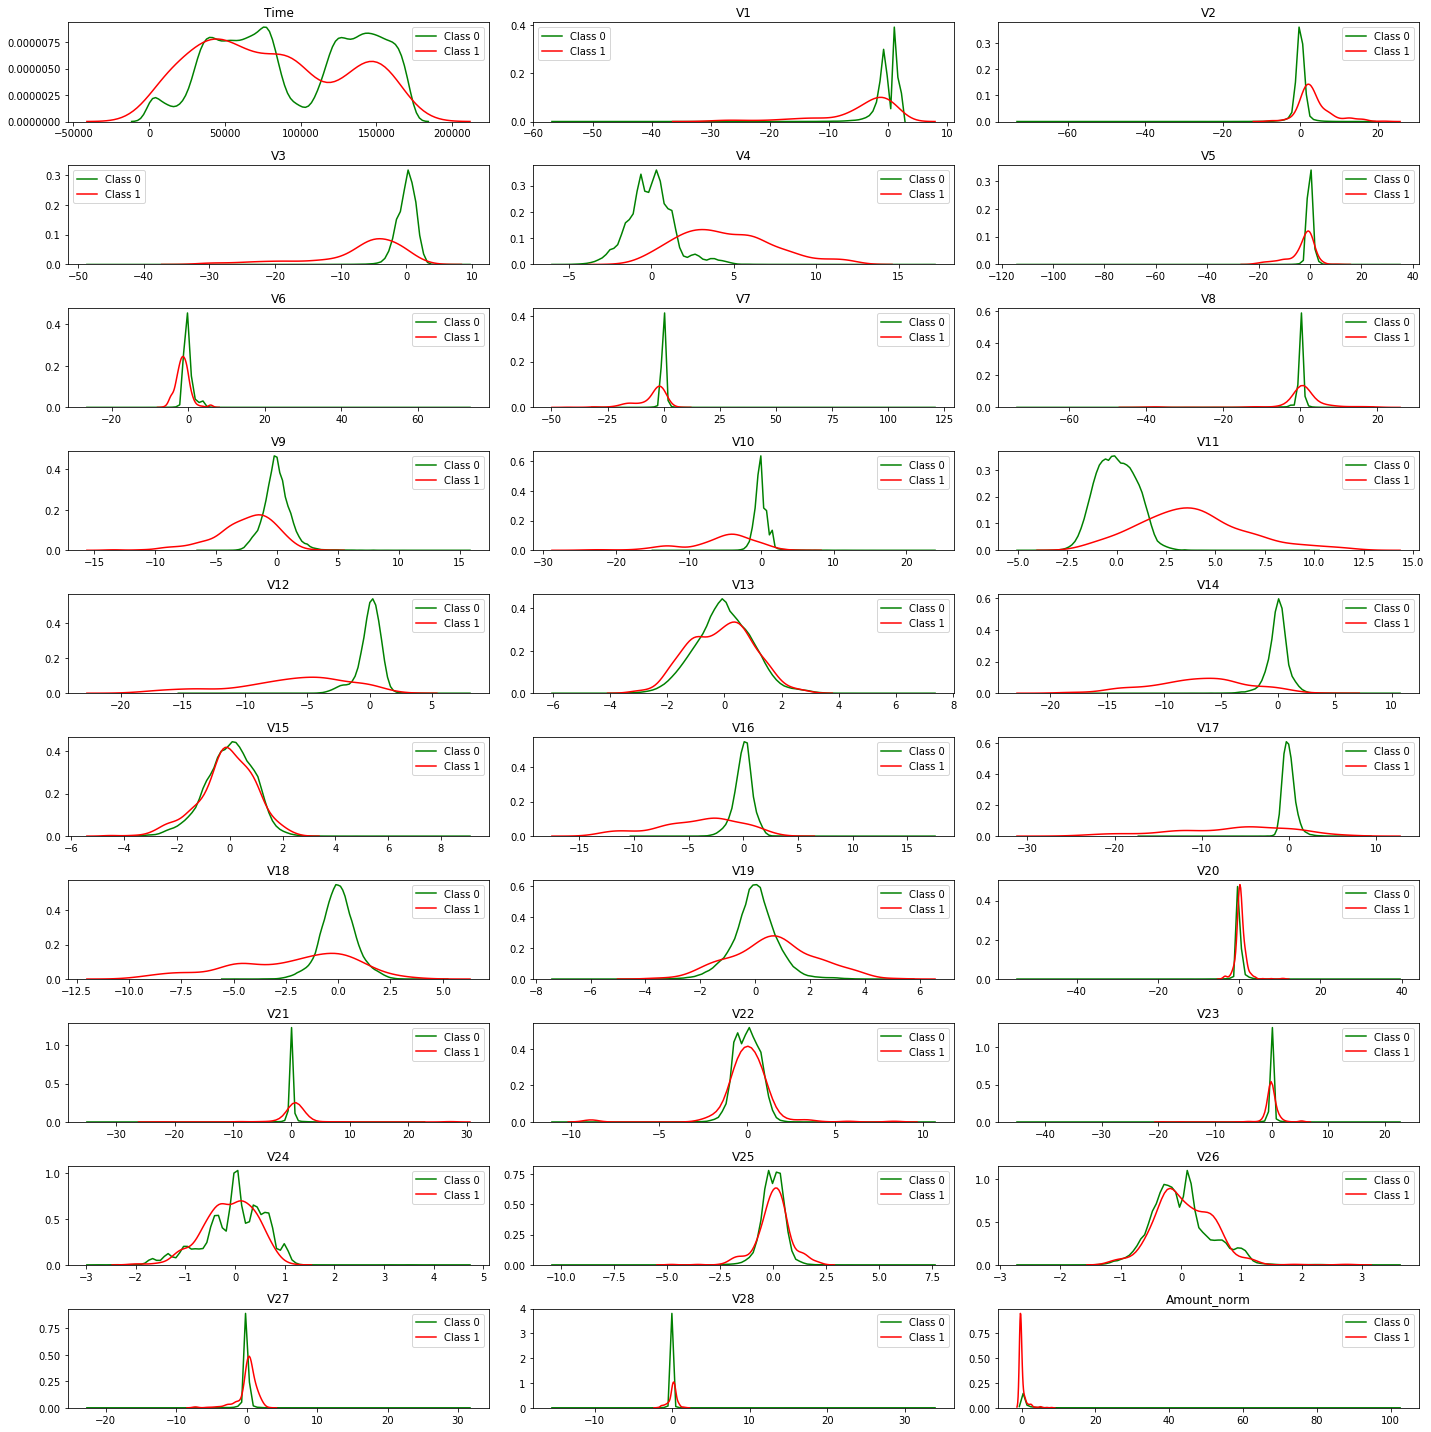

In [279]:
# Kernal density plots over the features compared between classes
plt.subplots(10,3, figsize=(20,20))

for i, col in enumerate(df.drop('Class', axis=1)):
    plt.subplot(10,3, i+1)
    sns.kdeplot(df[col].loc[df.Class == 0], color='green', label='Class 0')
    sns.kdeplot(df[col].loc[df.Class == 1], color='red', label='Class 1') 
    plt.title(col)

plt.tight_layout()    
plt.show()

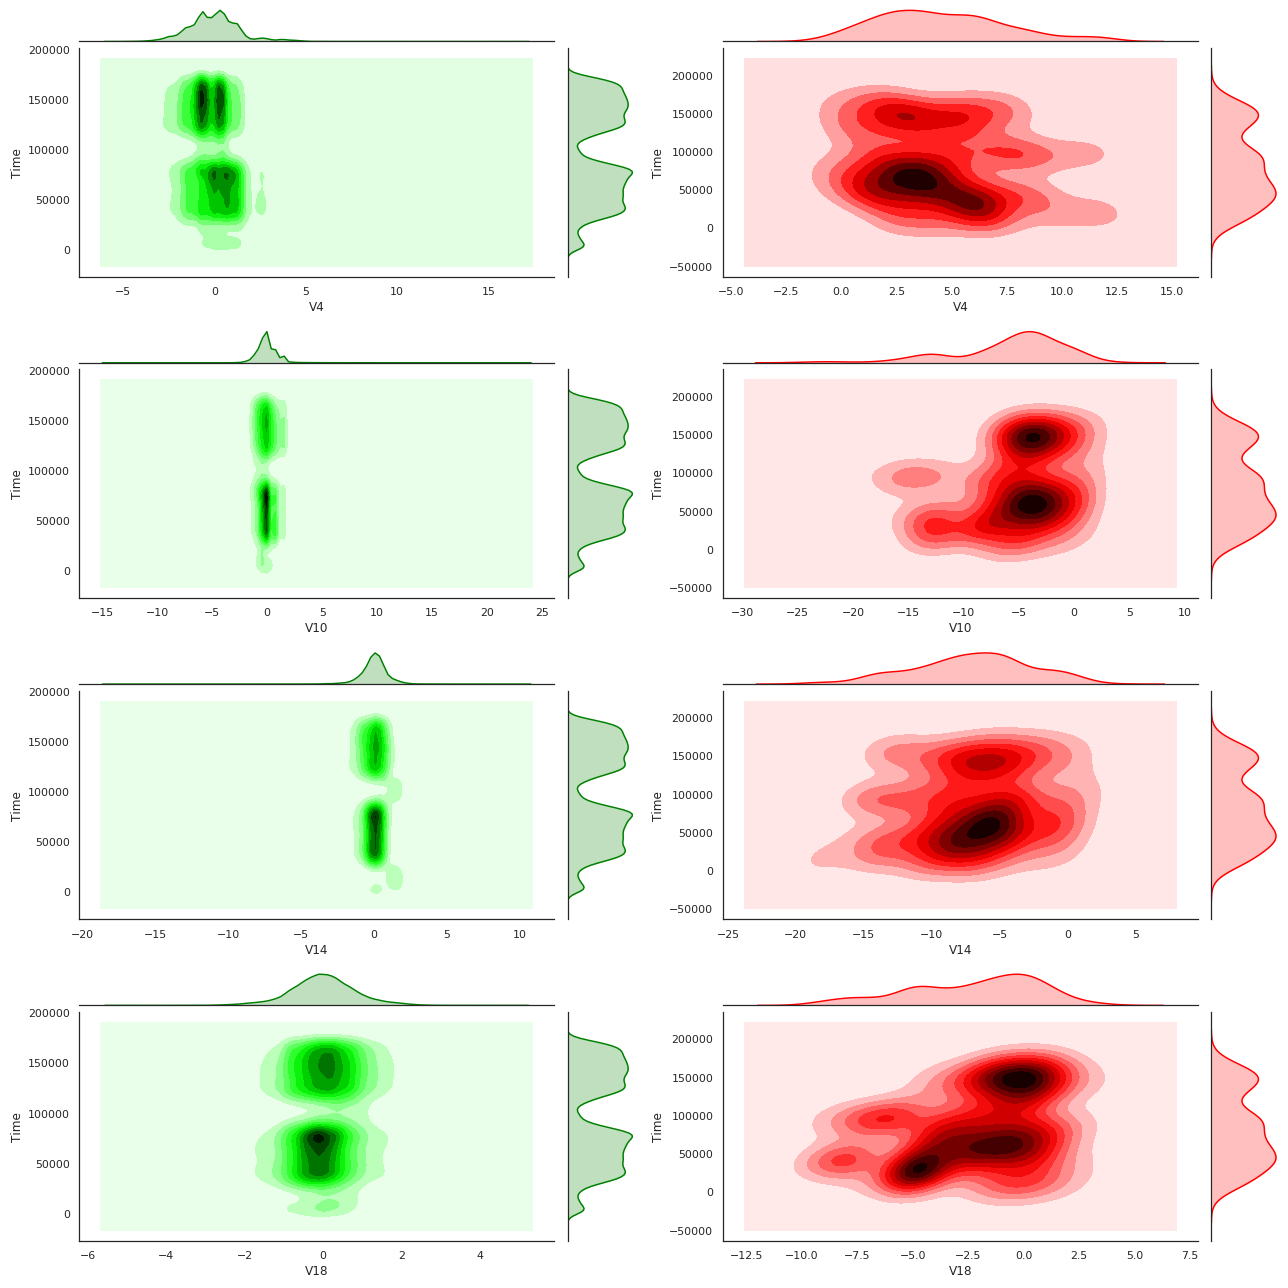

In [346]:
fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(4,2)
 
# Showcase relationship between features to note and amount between classes
v40 = sns.jointplot(y=df.Time.loc[df.Class == 0], x=X['V4'].loc[df.Class == 0], color='green', kind='kde')
v41 = sns.jointplot(y=df.Time.loc[df.Class == 1], x=X['V4'].loc[df.Class == 1], color='red', kind='kde')

v100 = sns.jointplot(y=df.Time.loc[df.Class == 0], x=X['V10'].loc[df.Class == 0], color='green', kind='kde')
v101 = sns.jointplot(y=df.Time.loc[df.Class == 1], x=X['V10'].loc[df.Class == 1], color='red', kind='kde')

v140 = sns.jointplot(y=df.Time.loc[df.Class == 0], x=X['V14'].loc[df.Class == 0], color='green', kind='kde')
v141 = sns.jointplot(y=df.Time.loc[df.Class == 1], x=X['V14'].loc[df.Class == 1], color='red', kind='kde')

v180 = sns.jointplot(y=df.Time.loc[df.Class == 0], x=X['V18'].loc[df.Class == 0], color='green', kind='kde')
v181 = sns.jointplot(y=df.Time.loc[df.Class == 1], x=X['V18'].loc[df.Class == 1], color='red', kind='kde')

# Subplotting
sp1 = SeabornFig2Grid(v40, fig, gs[0])
sp2 = SeabornFig2Grid(v41, fig, gs[1])
sp3 = SeabornFig2Grid(v100, fig, gs[2])
sp4 = SeabornFig2Grid(v101, fig, gs[3])
sp5 = SeabornFig2Grid(v140, fig, gs[4])
sp6 = SeabornFig2Grid(v141, fig, gs[5])
sp7 = SeabornFig2Grid(v180, fig, gs[6])
sp8 = SeabornFig2Grid(v181, fig, gs[7])

gs.tight_layout(fig)
plt.show()

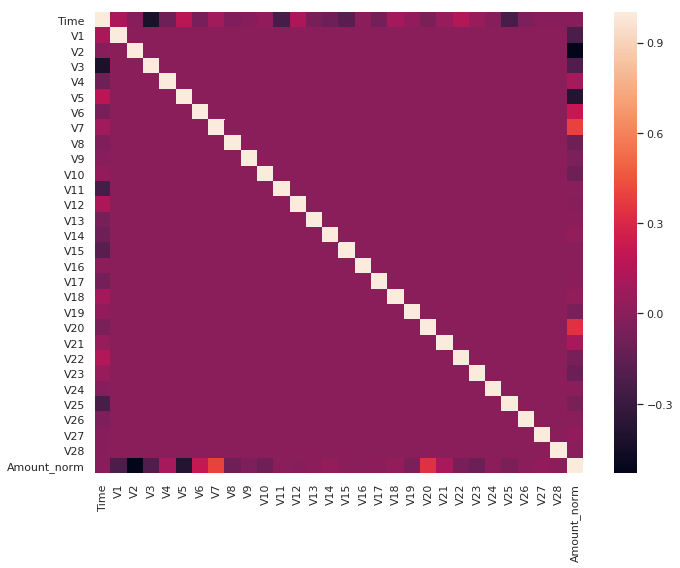

In [335]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X.corr())
plt.tight_layout()

Feature Engineering and Logistic Regression Tests

In [550]:
import imblearn
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Set features
X = df.drop('Class', axis=1)
# Set independent variable
y = df['Class']

# Unbalanced: training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# print shapes of training/testing sets
print('No Random Sampling: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Set Samplers to balance training data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

# SMOTE Tomek Links Sampling: training and test data split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smt, y_smt, test_size=0.3, shuffle=True)
print('SMOTE Tomek Links Sampling: ', Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape)

# Random Over Sampling: training and test data split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_ros, y_ros, test_size=0.3, shuffle=True)
print('Random Over Sampling: ', Xo_train.shape, Xo_test.shape, yo_train.shape, yo_test.shape)

# Random Under Sampling: training and test data split
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_rus, y_rus, test_size=0.3, shuffle=True)
print('Random Under Sampling: ', Xu_train.shape, Xu_test.shape, yu_train.shape, yu_test.shape)

No Random Sampling:  (199364, 30) (85443, 30) (199364,) (85443,)
SMOTE Tomek Links Sampling:  (397801, 30) (170487, 30) (397801,) (170487,)
Random Over Sampling:  (398041, 30) (170589, 30) (398041,) (170589,)
Random Under Sampling:  (688, 30) (296, 30) (688,) (296,)


In [553]:
from sklearn.metrics import log_loss

train_dict = {'No Sampling': [X_train, y_train, X_test, y_test],
              'SMOTE Tomek Sampling': [Xs_train, ys_train, Xs_test, ys_test],
              'Random Over Sampling': [Xo_train, yo_train, Xo_test, yo_test],
              'Random Under Sampling': [Xu_train, yu_train, Xu_test, yu_test]}

for cat, mod in train_dict.items():
    
    #logistic regression
    lm = linear_model.LogisticRegression()
    
    X_tra, y_tra, X_te, y_te = mod[0], mod[1], mod[2], mod[3]
    lm.fit(X_tra, y_tra)
    log_probs = lm.predict_proba(X_te)
    loss = log_loss(y_te, log_probs)
    print(cat)
    print(f'Loss value: {loss}')
    print(f'Training accuracy: {str(lm.score(X_tra, y_tra))[:5]}%')
    print(f'Test accuracy: {str(lm.score(X_te, y_te))[:5]}% \n')

No Sampling
Loss value: 0.009809114812096313
Training accuracy: 0.998%
Test accuracy: 0.999% 

SMOTE Tomek Sampling
Loss value: 0.14705500016110704
Training accuracy: 0.959%
Test accuracy: 0.959% 

Random Over Sampling
Loss value: 0.20171537550662236
Training accuracy: 0.932%
Test accuracy: 0.931% 

Random Under Sampling
Loss value: 0.1657559181464192
Training accuracy: 0.940%
Test accuracy: 0.956% 



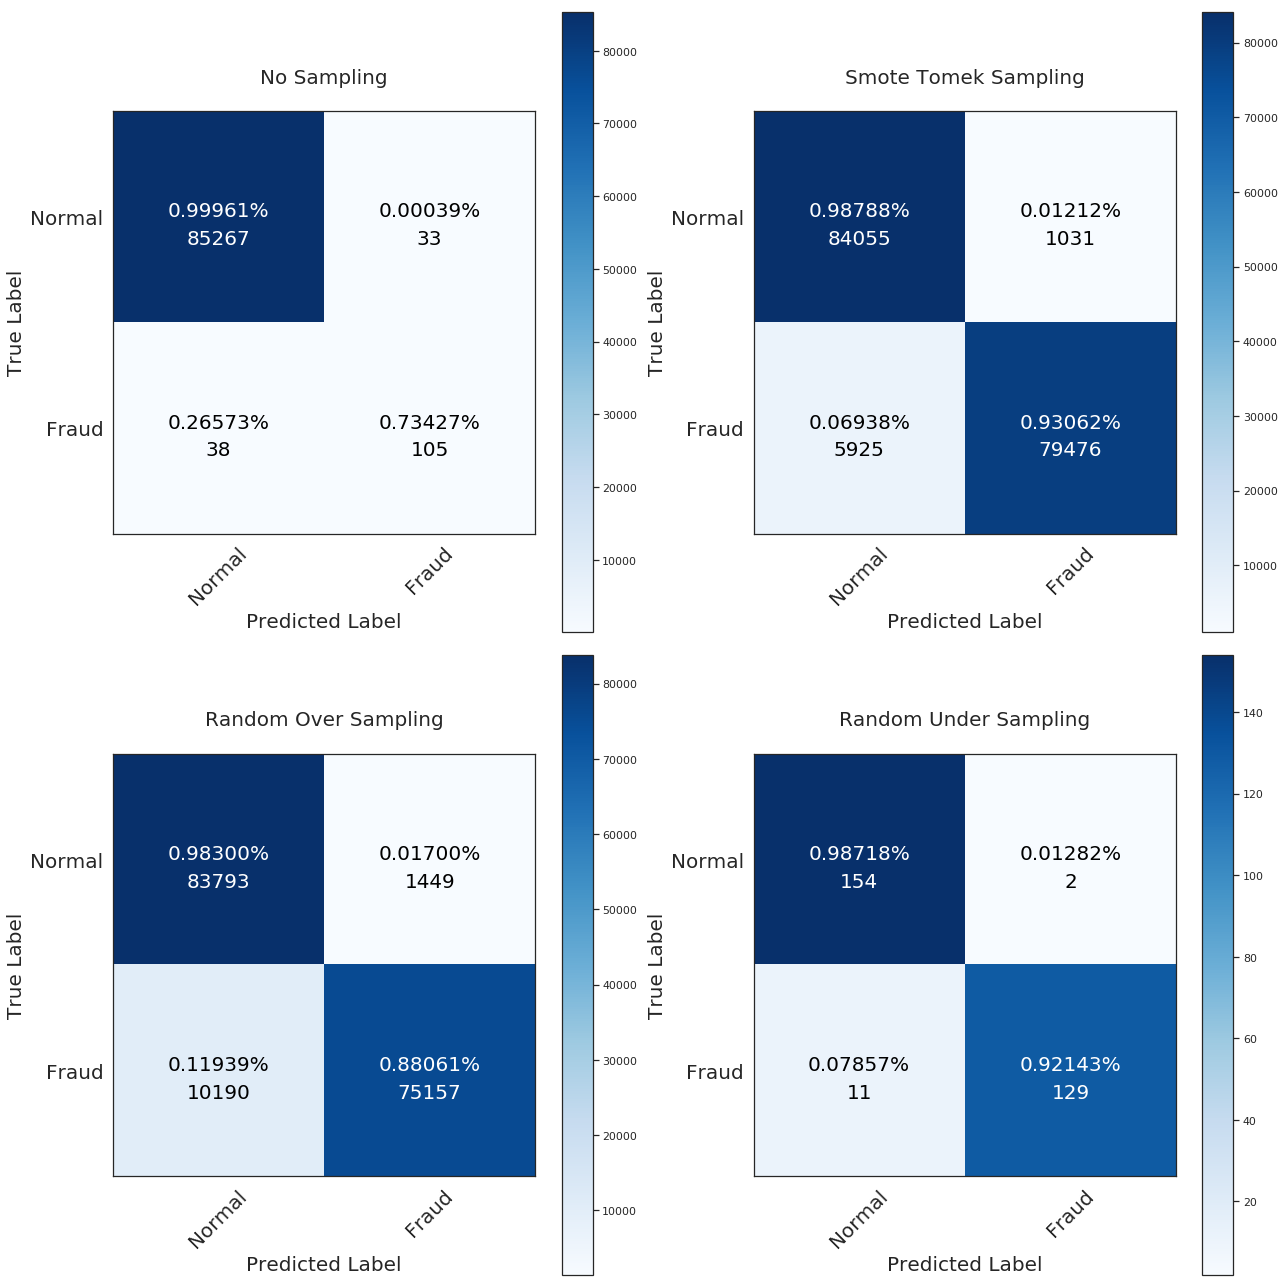

---Classification Reports---

No Sampling
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.76      0.73      0.75       143

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443
 

SMOTE Tomek Sampling
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     85086
           1       0.99      0.93      0.96     85401

   micro avg       0.96      0.96      0.96    170487
   macro avg       0.96      0.96      0.96    170487
weighted avg       0.96      0.96      0.96    170487
 

Random Over Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85242
           1       0.98      0.88      0.93     85347

   micro avg       0.93      0.93      0.93    170589
   macro avg       0.94      0.93      0

In [597]:
# Set matrix variables
X_trains = [X_train, Xs_train, Xo_train, Xu_train]
y_trains = [y_train, ys_train, yo_train, yu_train]
X_tests = [X_test, Xs_test, Xo_test, Xu_test]
y_tests = [y_test, ys_test, yo_test, yu_test]
titles = ['No Sampling', 'SMOTE Tomek Sampling', 'Random Over Sampling', 'Random Under Sampling']

# Show plots + Classification report
plot_matrices(X_trains, y_trains, X_tests, y_tests, titles)

Optimal number of features: 11
Selected features: ['V4', 'V8', 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V23', 'V27']


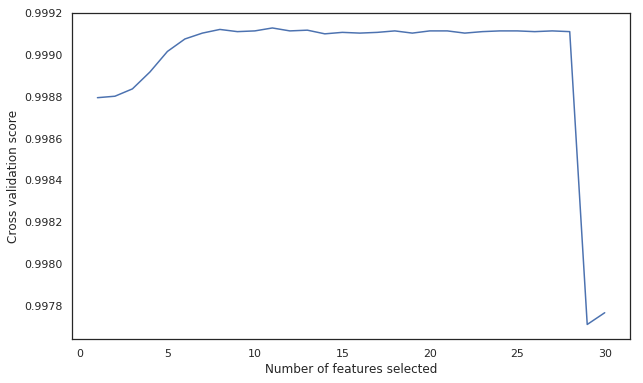

In [598]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV

#set the model and fit entire data to RFECV--train/test splits are done automatically and cross-validated.
lm = linear_model.LogisticRegression()
rfecv = RFECV(estimator=lm, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

opt_features = list(X.columns[rfecv.support_])

print('Optimal number of features: %d' % rfecv.n_features_)
print('Selected features: %s' % opt_features)

#plot features vs. validation scores
plt.figure(figsize=(10,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [599]:
X = X[opt_features]

# Unbalanced: training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# print shapes of training/testing sets
print('Optimal Features-No Random Sampling: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Set Samplers to balance training data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

# SMOTE Tomek Links Sampling: training and test data split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smt, y_smt, test_size=0.3, shuffle=True)
print('Optimal Features-SMOTE Tomek Links Sampling: ', Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape)

# Random Over Sampling: training and test data split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_ros, y_ros, test_size=0.3, shuffle=True)
print('Optimal Features-Random Over Sampling: ', Xo_train.shape, Xo_test.shape, yo_train.shape, yo_test.shape)

# Random Under Sampling: training and test data split
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_rus, y_rus, test_size=0.3, shuffle=True)
print('Optimal Features-Random Under Sampling: ', Xu_train.shape, Xu_test.shape, yu_train.shape, yu_test.shape)

Optimal Features-No Random Sampling:  (199364, 11) (85443, 11) (199364,) (85443,)
Optimal Features-SMOTE Tomek Links Sampling:  (398041, 11) (170589, 11) (398041,) (170589,)
Optimal Features-Random Over Sampling:  (398041, 11) (170589, 11) (398041,) (170589,)
Optimal Features-Random Under Sampling:  (688, 11) (296, 11) (688,) (296,)


In [600]:
from sklearn.metrics import log_loss

train_dict = {'No Sampling': [X_train, y_train, X_test, y_test],
              'SMOTE Tomek Sampling': [Xs_train, ys_train, Xs_test, ys_test],
              'Random Over Sampling': [Xo_train, yo_train, Xo_test, yo_test],
              'Random Under Sampling': [Xu_train, yu_train, Xu_test, yu_test]}

for cat, mod in train_dict.items():
    
    #logistic regression
    lm = linear_model.LogisticRegression()
    
    X_tra, y_tra, X_te, y_te = mod[0], mod[1], mod[2], mod[3]
    lm.fit(X_tra, y_tra)
    log_probs = lm.predict_proba(X_te)
    loss = log_loss(y_te, log_probs)
    print(cat)
    print(f'Loss value: {loss}')
    print(f'Training accuracy: {str(lm.score(X_tra, y_tra))[:5]}%')
    print(f'Test accuracy: {str(lm.score(X_te, y_te))[:5]}% \n')

No Sampling
Loss value: 0.004020654596201408
Training accuracy: 0.999%
Test accuracy: 0.999% 

SMOTE Tomek Sampling
Loss value: 0.15320190382813623
Training accuracy: 0.933%
Test accuracy: 0.934% 

Random Over Sampling
Loss value: 0.15645794595564017
Training accuracy: 0.936%
Test accuracy: 0.936% 

Random Under Sampling
Loss value: 0.17076497065642424
Training accuracy: 0.931%
Test accuracy: 0.942% 



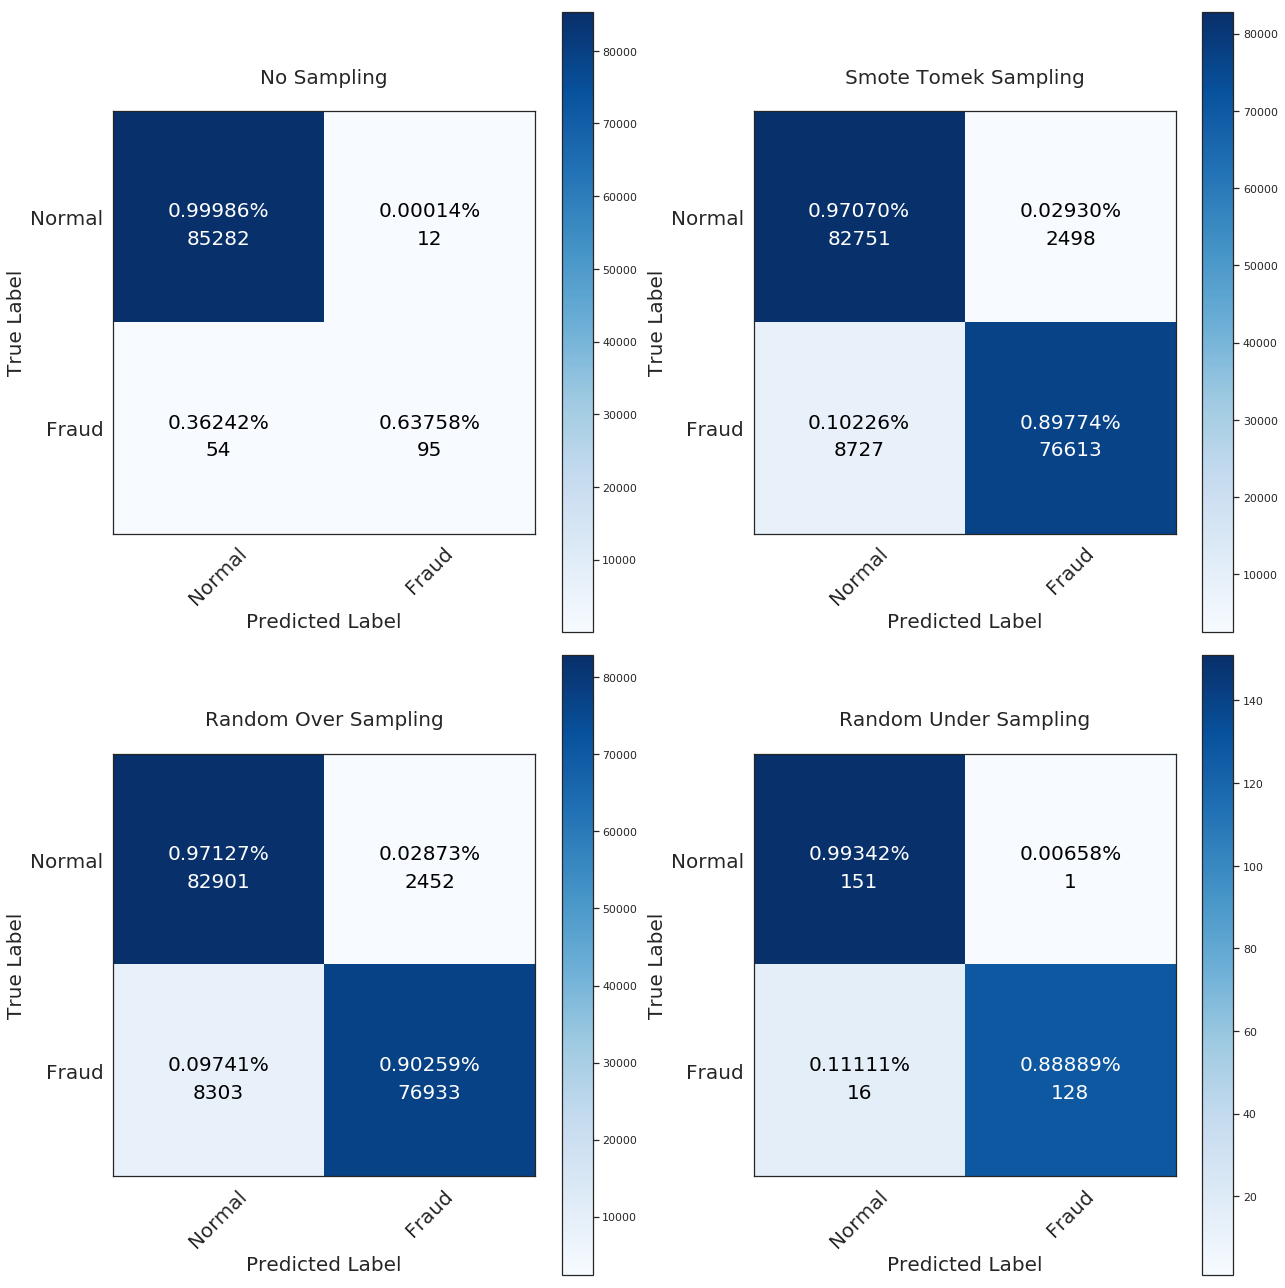

---Classification Reports---

No Sampling
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.89      0.64      0.74       149

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443
 

SMOTE Tomek Sampling
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     85249
           1       0.97      0.90      0.93     85340

   micro avg       0.93      0.93      0.93    170589
   macro avg       0.94      0.93      0.93    170589
weighted avg       0.94      0.93      0.93    170589
 

Random Over Sampling
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     85353
           1       0.97      0.90      0.93     85236

   micro avg       0.94      0.94      0.94    170589
   macro avg       0.94      0.94      0

In [601]:
# Set matrix variables
X_trains = [X_train, Xs_train, Xo_train, Xu_train]
y_trains = [y_train, ys_train, yo_train, yu_train]
X_tests = [X_test, Xs_test, Xo_test, Xu_test]
y_tests = [y_test, ys_test, yo_test, yu_test]
titles = ['No Sampling', 'SMOTE Tomek Sampling', 'Random Over Sampling', 'Random Under Sampling']

# Show plots + Classification report
plot_matrices(X_trains, y_trains, X_tests, y_tests, titles)

In [602]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#initialize gradientboost and xgboost
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
#fit models
gb.fit(Xo_train,yo_train)
xgb.fit(Xo_train,yo_train)
#score models
print(f'Gradient Boost score: {(100 * gb.score(Xo_test,yo_test))}%')
print(f'XG Boost score: {(100 * xgb.score(Xo_test,yo_test))}%')

Gradient Boost score: 98.67986798679867%
XG Boost score: 97.99635380944845%


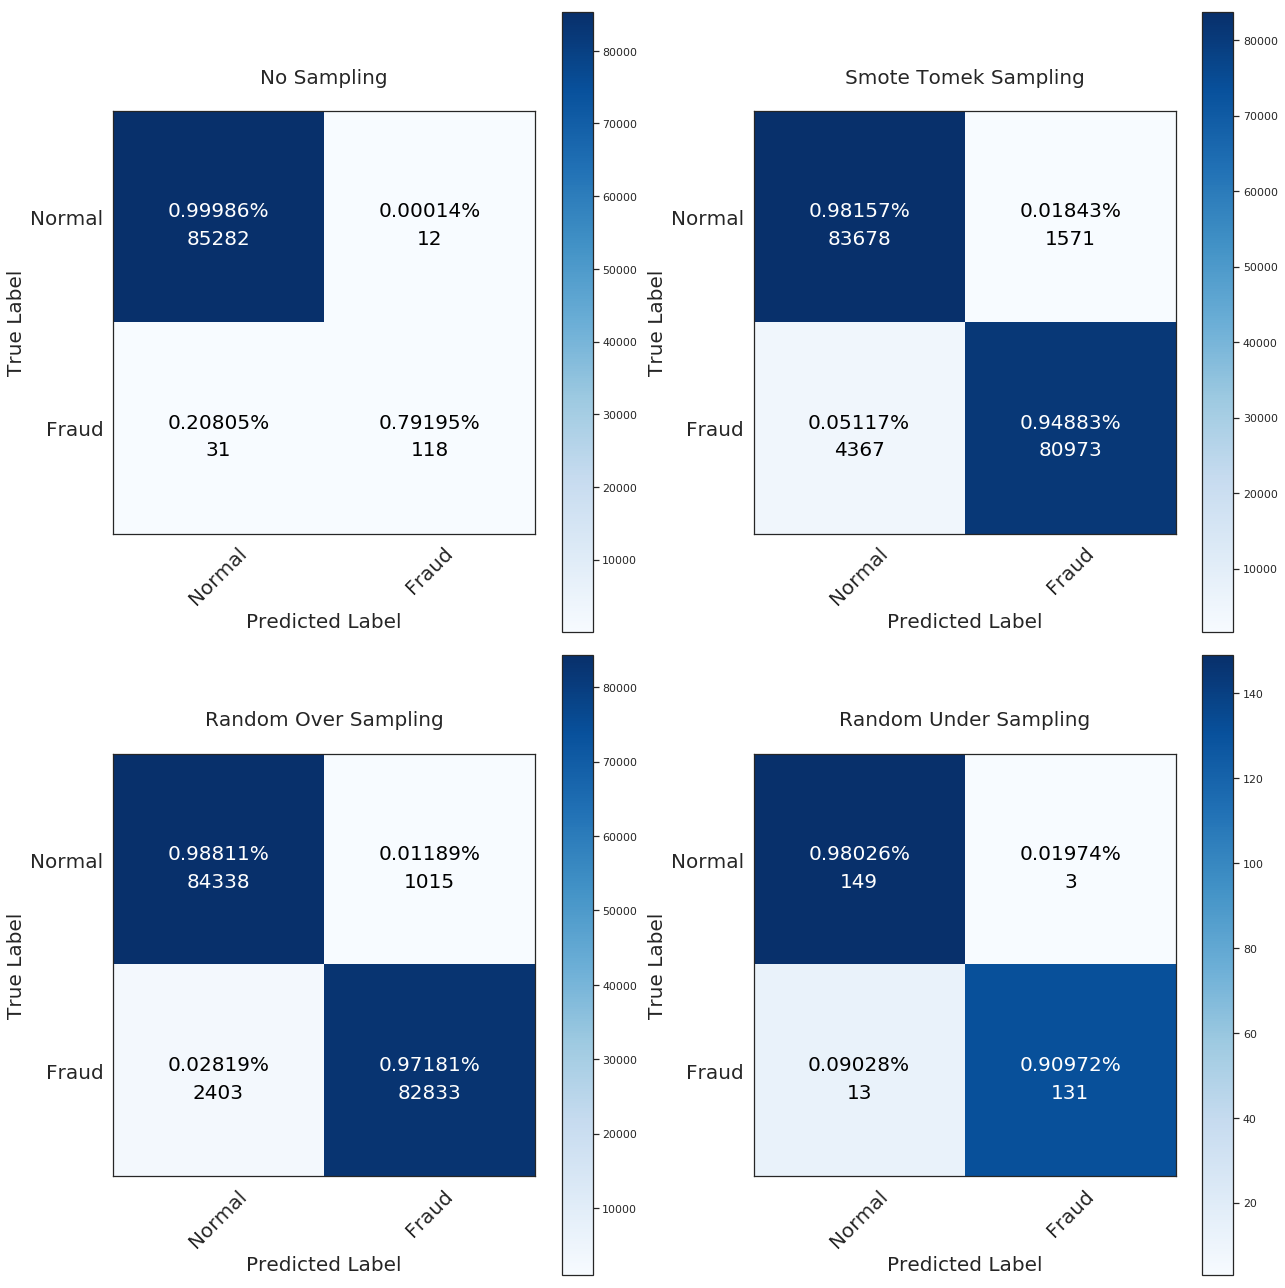

---Classification Reports---

No Sampling
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.91      0.79      0.85       149

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443
 

SMOTE Tomek Sampling
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85249
           1       0.98      0.95      0.96     85340

   micro avg       0.97      0.97      0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589
 

Random Over Sampling
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85353
           1       0.99      0.97      0.98     85236

   micro avg       0.98      0.98      0.98    170589
   macro avg       0.98      0.98      0

In [605]:
plot_matrices(X_trains, y_trains, X_tests, y_tests, titles, model='xgb')